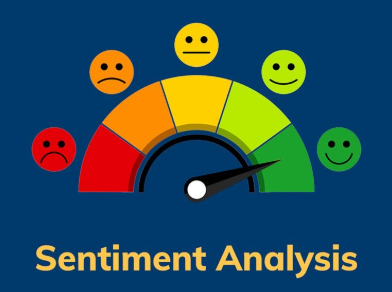

In [27]:
from IPython.display import Image

Image(filename='./Sentimental_Analysis_Kshitij.png', width=800)


In [28]:
import pandas as pd 
import numpy as np

dataset = pd.read_csv("Data\Kshitij_Dataset.csv")
dataset

,"""Comments_Sentiments"""
0,"""I love the new features in the update.,Positive"""
1,"""Fast and efficient customer support.,Positive"""
2,"""The product quality is amazing!,Positive"""
3,"""Fast and efficient customer support.,Positive"""
4,"""I am disappointed with the delivery.,Neutral"""
...,...
19998,"""Fast and efficient customer support.,Positive"""
19999,"""The room was clean but noisy.,Neutral"""
20000,"""The product quality is amazing!,Positive"""
20001,"""I am disappointed with the delivery.,Negative"""


In [29]:
dataset.value_counts()

"Comments_Sentiments"                            
"I love the new features in the update.,Positive"    1749
"Excellent ambiance and friendly staff.,Positive"    1714
"I am disappointed with the delivery.,Negative"      1713
"The service was okay, not great.,Neutral"           1712
"The room was clean but noisy.,Neutral"              1711
"Fast and efficient customer support.,Positive"      1709
"The product quality is amazing!,Positive"           1708
"The app interface is confusing.,Negative"           1704
"The food was cold and tasteless.,Negative"          1699
"Very poor customer service experience.,Negative"    1684
",Negative"                                           414
",Positive"                                           375
",Neutral"                                            212
"Very poor customer service experience.,Positive"     109
"I am disappointed with the delivery.,Neutral"        106
"Excellent ambiance and friendly staff.,Neutral"      104
"The product quality i

In [30]:
cols = dataset.columns
print(cols)

Index(['"Comments_Sentiments"'], dtype='object')


In [31]:
# Assuming the dataset is already loaded into a DataFrame
exact_column_name = dataset.columns[0]  # Assuming the first column is the one we need

# Split the column where sentence delimiters are encountered
split_columns = dataset[exact_column_name].str.split(r'[.!?]', expand=True)

# Rename the columns based on the expected structure
split_columns.columns = ['Comments', 'Sentiment']

# Print the Comments column
print(f"Some of the Comments:\n")
print(split_columns['Comments'].head(5))
print("="*50)

# Combine the split columns into a usable dataset
usable_dataset = pd.concat([split_columns['Comments'],
                             split_columns['Sentiment']], axis=1)

# Uncomment the next line to save the new dataset to a CSV file
# usable_dataset.to_csv('path_to_save_usable_dataset.csv', index=False)

usable_dataset.to_csv('./Kshitij_Dataset', index=False)

Some of the Comments:

0    "I love the new features in the update
1      "Fast and efficient customer support
2           "The product quality is amazing
3      "Fast and efficient customer support
4      "I am disappointed with the delivery
Name: Comments, dtype: object


In [32]:
dataset.nunique()

"Comments_Sentiments"    35
dtype: int64

> **_By Human Inspection of the Raw Dataset (provided by the Organizers) it is more than evident that this is not a proper dataset for Sentiment Analysis Training_**

> **_Exce and friendly staff.,Negative_** ????
> **_Blah blah blah,Negative_** ???
> **_The food was cold and tasteless.,Positive_** ???

> This is not a proper dataset according to us.


In [33]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


> **_Trying to use any pre-trained model for accurate class label fixing_**


In [34]:
from transformers import AutoTokenizer
from nltk.stem import PorterStemmer
import pandas as pd
import string

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Load a pre-trained tokenizer from Hugging Face (e.g., BERT tokenizer)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define a cleaning function
def clean_text_with_stemming(text):
    if pd.isnull(text) or not isinstance(text, str):  # Check for NaN or non-string values
        return " "
    
    # Tokenize text using Hugging Face's tokenizer
    tokens = tokenizer.tokenize(text)
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Apply stemming using Porter Stemmer
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Reconstruct the cleaned text
    cleaned_text = ' '.join(tokens)
    return str(cleaned_text)

# Apply the cleaning function to the 'Comments' column
usable_dataset['Cleaned_Comments'] = usable_dataset['Comments'].apply(clean_text_with_stemming)
usable_dataset['Cleaned_Sentiment'] = usable_dataset['Sentiment'].apply(clean_text_with_stemming)

In [35]:
usable_dataset.head(10)

,Comments,Sentiment,Cleaned_Comments,Cleaned_Sentiment
0,"""I love the new features in the update",",Positive""",i love the new featur in the updat,posit
1,"""Fast and efficient customer support",",Positive""",fast and effici custom support,posit
2,"""The product quality is amazing",",Positive""",the product qualiti is amaz,posit
3,"""Fast and efficient customer support",",Positive""",fast and effici custom support,posit
4,"""I am disappointed with the delivery",",Neutral""",i am disappoint with the deliveri,neutral
5,"""The service was okay, not great",",Neutral""",the servic wa okay not great,neutral
6,"""The food was cold and tasteless",",Negative""",the food wa cold and tast ##less,neg
7,"""I am disappointed with the delivery",",Negative""",i am disappoint with the deliveri,neg
8,"""Excellent ambiance and friendly staff",",Positive""",excel am ##bian ##ce and friendli staff,posit
9,"""Very poor customer service experience",",Negative""",veri poor custom servic experi,neg


In [36]:
# Create a unique list of comments and sentiments
unique_comments = usable_dataset[['Cleaned_Comments', 'Cleaned_Sentiment']].drop_duplicates()
unique_comments = unique_comments.reset_index(drop=True)

print(f"Total unique comments: {len(unique_comments)}")
print(f"\nSample of unique comments and their sentiments: {len(unique_comments)/len(usable_dataset):.2%}\n")

Total unique comments: 35

Sample of unique comments and their sentiments: 0.17%



In [37]:
unique_comments

,Cleaned_Comments,Cleaned_Sentiment
0,i love the new featur in the updat,posit
1,fast and effici custom support,posit
2,the product qualiti is amaz,posit
3,i am disappoint with the deliveri,neutral
4,the servic wa okay not great,neutral
5,the food wa cold and tast ##less,neg
6,i am disappoint with the deliveri,neg
7,excel am ##bian ##ce and friendli staff,posit
8,veri poor custom servic experi,neg
9,the room wa clean but noisi,posit


In [38]:
%pip install torch transformers tqdm scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


> Using Pre-Trained Distil-Bert Model to Correct the labellings

In [39]:
# from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# # Load a pre-trained sentiment analysis pipeline (alternative to LLAMA for simplicity)
# classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased")

# # Generate predictions for the Comments column
# def predict_sentiment(comment):
#     if pd.isnull(comment):
#         return "Neutral"  # Default for missing comments
#     result = classifier(comment)[0]
#     label = result['label']
#     return "Positive" if label == "POSITIVE" else "Negative" if label == "NEGATIVE" else "Neutral"

# # Apply sentiment prediction to the dataset
# unique_comments['Corrected_Sentiment'] = unique_comments['Cleaned_Comments'].apply(predict_sentiment)

In [40]:
# unique_comments

In [41]:
# # Count NaN values in Corrected_Sentiment column
# nan_count = dataset['Corrected_Sentiment'].isna().sum()
# total_rows = len(dataset)

# print(f"Number of NaN values in Corrected_Sentiment: {nan_count}")
# print(f"Percentage of NaN values: {(nan_count/total_rows)*100:.2f}%")

> ***Fine-Tuning The Distil Bert Model on Our Data***

In [42]:
# Map sentiments to numerical labels
label_mapping = {'neg': 0, 'neutral': 1, 'posit': 2}
unique_comments['Encoded_Sentiment'] = unique_comments['Cleaned_Sentiment'].map(label_mapping)

# Replace NaN with Neutral
unique_comments['Encoded_Sentiment'] = unique_comments['Encoded_Sentiment'].fillna(1).astype(int)


In [43]:
print("Unique labels:", unique_comments['Encoded_Sentiment'].unique())


Unique labels: [2 1 0]


In [44]:
unique_comments.describe()

,Encoded_Sentiment
count,35.000000
mean,1.000000
std,0.766965
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [45]:
unique_comments.head(20)

,Cleaned_Comments,Cleaned_Sentiment,Encoded_Sentiment
0,i love the new featur in the updat,posit,2
1,fast and effici custom support,posit,2
2,the product qualiti is amaz,posit,2
3,i am disappoint with the deliveri,neutral,1
4,the servic wa okay not great,neutral,1
5,the food wa cold and tast ##less,neg,0
6,i am disappoint with the deliveri,neg,0
7,excel am ##bian ##ce and friendli staff,posit,2
8,veri poor custom servic experi,neg,0
9,the room wa clean but noisi,posit,2


In [46]:
# # Reduce the value of each label in 'Encoded_Sentiment' by -1
# unique_comments['Encoded_Sentiment'] -= 1

# # Delete the row with negative 'Encoded_Sentiment' value
# unique_comments = unique_comments[unique_comments['Encoded_Sentiment'] >= 0]

# unique_comments.reset_index(drop=True, inplace=True)
# unique_comments.head(20)

In [47]:
print("Unique labels in dataset:", unique_comments['Encoded_Sentiment'].unique())
print("Max label value:", unique_comments['Encoded_Sentiment'].max())
print("Min label value:", unique_comments['Encoded_Sentiment'].min())


Unique labels in dataset: [2 1 0]
Max label value: 2
Min label value: 0


> Training Distil-BERT on the dataset to correctly predict the labels

In [48]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
# Variable Declarations
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification
from transformers import AdamW
from tqdm import tqdm

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  
EPOCHS = 10  
num_labels = 3 
print("Unique labels:", unique_comments['Encoded_Sentiment'].unique())
num_labels = len(unique_comments['Encoded_Sentiment'].unique())

# Initialize model with the correct number of labels
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=num_labels
)
model.to(DEVICE) 

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training loop
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    correct_predictions = 0

    loop = tqdm(data_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(DEVICE)
        attention_mask = batch["attention_mask"].to(DEVICE)
        labels = batch["label"].to(DEVICE).long()

        # Debug labels (optional)
        print("Batch labels:", labels.unique())

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        # Compute accuracy
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Update progress bar
        loop.set_description(f"Epoch {epoch + 1}")
        loop.set_postfix(loss=loss.item())

    # Epoch results
    accuracy = correct_predictions.double() / len(dataset)
    print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}, Accuracy = {accuracy:.4f}")


Unique labels: [2 1 0]


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 1:  50%|█████     | 1/2 [00:01<00:01,  1.16s/it, loss=1.1]

Batch labels: tensor([0, 1])


Epoch 1: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s, loss=1.13]


Epoch 1: Loss = 2.2375, Accuracy = 0.3143


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 2:  50%|█████     | 1/2 [00:00<00:00,  1.12it/s, loss=1.09]

Batch labels: tensor([0, 1, 2])


Epoch 2: 100%|██████████| 2/2 [00:01<00:00,  1.56it/s, loss=1.1] 


Epoch 2: Loss = 2.1829, Accuracy = 0.2857


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 3:  50%|█████     | 1/2 [00:00<00:00,  1.09it/s, loss=1.1]

Batch labels: tensor([1, 2])


Epoch 3: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s, loss=1.14]


Epoch 3: Loss = 2.2350, Accuracy = 0.3143


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 4:  50%|█████     | 1/2 [00:00<00:00,  1.13it/s, loss=1.09]

Batch labels: tensor([0, 1])


Epoch 4: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s, loss=1.14]


Epoch 4: Loss = 2.2351, Accuracy = 0.3714


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 5:  50%|█████     | 1/2 [00:00<00:00,  1.14it/s, loss=1.08]

Batch labels: tensor([0, 1, 2])


Epoch 5: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s, loss=1.12]


Epoch 5: Loss = 2.1960, Accuracy = 0.4286


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 6:  50%|█████     | 1/2 [00:00<00:00,  1.03it/s, loss=1.07]

Batch labels: tensor([0, 1])


Epoch 6: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s, loss=1]   


Epoch 6: Loss = 2.0777, Accuracy = 0.4571


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 7:  50%|█████     | 1/2 [00:00<00:00,  1.14it/s, loss=1.1]

Batch labels: tensor([0, 1])


Epoch 7: 100%|██████████| 2/2 [00:01<00:00,  1.62it/s, loss=0.998]


Epoch 7: Loss = 2.0964, Accuracy = 0.4286


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 8:  50%|█████     | 1/2 [00:00<00:00,  1.14it/s, loss=1.07]

Batch labels: tensor([1, 2])


Epoch 8: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s, loss=1.17]


Epoch 8: Loss = 2.2431, Accuracy = 0.4286


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 9:  50%|█████     | 1/2 [00:00<00:00,  1.13it/s, loss=1.07]

Batch labels: tensor([0, 1])


Epoch 9: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s, loss=1.07]


Epoch 9: Loss = 2.1417, Accuracy = 0.4286


  0%|          | 0/2 [00:00<?, ?it/s]

Batch labels: tensor([0, 1, 2])


Epoch 10:  50%|█████     | 1/2 [00:00<00:00,  1.14it/s, loss=1.04]

Batch labels: tensor([1, 2])


Epoch 10: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s, loss=1.15]

Epoch 10: Loss = 2.1946, Accuracy = 0.4286


In [61]:
from transformers import DistilBertTokenizer
import torch
import pandas as pd

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Function to preprocess and tokenize the text
def preprocess_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

# Load the dataset
comments = unique_comments["Cleaned_Comments"]

# Preprocess the Cleaned_Comments
tokenized_inputs = preprocess_texts(comments, tokenizer)

# Move data to the same device as the model
input_ids = tokenized_inputs["input_ids"].to(DEVICE)
attention_mask = tokenized_inputs["attention_mask"].to(DEVICE)

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits

# Convert logits to predicted labels
predicted_labels = torch.argmax(logits, dim=1).cpu().numpy()

# Map encoded predictions to sentiment labels
label_mapping = {0: "neg", 1: "neutral", 2: "posit"}
predicted_sentiments = [label_mapping[label] for label in predicted_labels]

# Add predictions to the DataFrame
unique_comments["Predicted_Sentiment"] = predicted_sentiments
unique_comments["Predicted_Encoded"] = predicted_labels

# Display the updated DataFrame
unique_comments.head(20)


,Cleaned_Comments,Cleaned_Sentiment,Encoded_Sentiment,Predicted_Sentiment,Predicted_Encoded
0,i love the new featur in the updat,posit,2,neutral,1
1,fast and effici custom support,posit,2,neutral,1
2,the product qualiti is amaz,posit,2,neutral,1
3,i am disappoint with the deliveri,neutral,1,neutral,1
4,the servic wa okay not great,neutral,1,neutral,1
5,the food wa cold and tast ##less,neg,0,neutral,1
6,i am disappoint with the deliveri,neg,0,neutral,1
7,excel am ##bian ##ce and friendli staff,posit,2,neutral,1
8,veri poor custom servic experi,neg,0,neutral,1
9,the room wa clean but noisi,posit,2,neutral,1


In [62]:
unique_comments.isnull().sum()

Cleaned_Comments       0
Cleaned_Sentiment      0
Encoded_Sentiment      0
Predicted_Sentiment    0
Predicted_Encoded      0
dtype: int64

In [63]:
# Check for matching rows
matching_rows = unique_comments[unique_comments['Cleaned_Sentiment'] == unique_comments['Predicted_Sentiment']]

# Display the matching rows
print(f"Percentage of matching rows: {len(matching_rows)/len(unique_comments):.2%}")
matching_rows.head(10)

Number of matching rows: 10


,Cleaned_Comments,Cleaned_Sentiment,Encoded_Sentiment,Predicted_Sentiment,Predicted_Encoded
3,i am disappoint with the deliveri,neutral,1,neutral,1
4,the servic wa okay not great,neutral,1,neutral,1
12,the room wa clean but noisi,neutral,1,neutral,1
13,excel am ##bian ##ce and friendli staff,neutral,1,neutral,1
15,veri poor custom servic experi,neutral,1,neutral,1
18,the product qualiti is amaz,neutral,1,neutral,1
20,the food wa cold and tast ##less,neutral,1,neutral,1
23,fast and effici custom support,neutral,1,neutral,1
24,the app interfac is confus,neutral,1,neutral,1
30,i love the new featur in the updat,neutral,1,neutral,1


> We can clearly see the Model is not agreeing with the Original Labels of the Dataset

> **_Even Distil-Bert isn't able to fix the Class Labels as intended. So we are forced to make use a new Dataset for making our Model_**
